In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#import dataset and view
df=pd.read_excel('Cal_housing.xlsx', sheet_name=0)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


# Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null int64
total_rooms           20640 non-null int64
total_bedrooms        20433 non-null float64
population            20640 non-null int64
households            20640 non-null int64
median_income         20640 non-null float64
ocean_proximity       20640 non-null object
median_house_value    20640 non-null int64
dtypes: float64(4), int64(5), object(1)
memory usage: 1.5+ MB


In [4]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age      int64
total_rooms             int64
total_bedrooms        float64
population              int64
households              int64
median_income         float64
ocean_proximity        object
median_house_value      int64
dtype: object

In [5]:
df.shape

(20640, 10)

In [6]:
X_features = df.iloc[:,:-1].values
y_label = df.iloc[:,-1].values

In [7]:
#checking null values
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [8]:
#filling NaN with mean value of column
df['total_bedrooms'].fillna((df['total_bedrooms'].mean()), inplace=True)

In [9]:
#check if any NaN values
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

In [10]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [11]:
#Convert categorical column in the dataset to numerical data
from sklearn.preprocessing import LabelEncoder
X_labelencoder=LabelEncoder()
X_features[:,-1]=X_labelencoder.fit_transform(X_features[:,-1])

In [12]:
X_features[:,-1]

array([3, 3, 3, ..., 1, 1, 1], dtype=object)

In [13]:
categ_dic = {"ocean_proximity": {"ISLAND" :0,"NEAR OCEAN" : 1,"NEAR BAY" : 2,"<1H OCEAN" :3,"INLAND" : 4}}

In [14]:
df.replace(categ_dic, inplace=True)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,2,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,2,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,2,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,2,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,2,342200


## Visualization

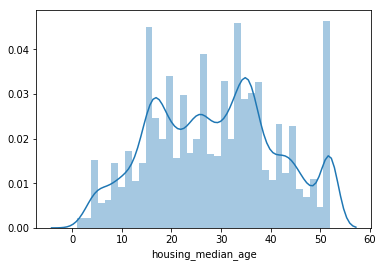

In [15]:
#some visualization of data
sns.distplot(df['housing_median_age'])

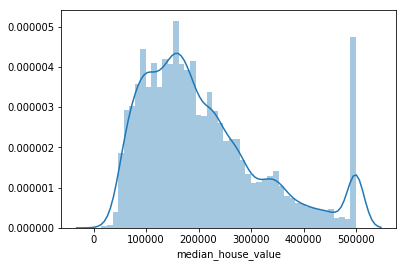

In [16]:
sns.distplot(df['median_house_value'])

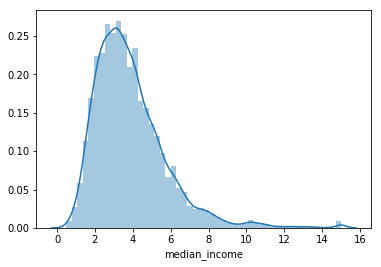

In [17]:
sns.distplot(df['median_income'])

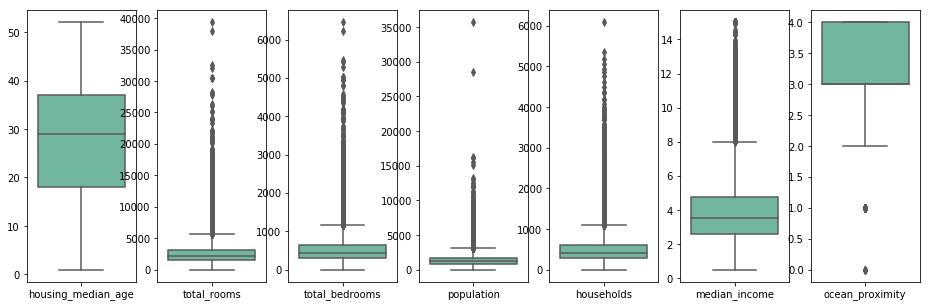

In [18]:
#outlier detection
fig, axes = plt.subplots(ncols=7, figsize=(16, 5))

sns.boxplot(data=df[['housing_median_age']],  palette='Set2', ax=axes[0]);
sns.boxplot(data=df[['total_rooms']]  ,  palette='Set2', ax=axes[1]);
sns.boxplot(data=df[['total_bedrooms']], palette='Set2', ax=axes[2]);
sns.boxplot(data=df[['population']],  palette='Set2', ax=axes[3]);

sns.boxplot(data=df[['households']],   palette='Set2', ax=axes[4]);
sns.boxplot(data=df[['median_income']]  ,  palette='Set2', ax=axes[5]);
sns.boxplot(data=df[['ocean_proximity']],   palette='Set2', ax=axes[6]);

## Model Building, Training & Predicting Phase

In [19]:
#creating X as features and y as label/price
X = df[['housing_median_age','total_rooms','total_bedrooms','population','households','median_income','ocean_proximity',]]
y = df['median_house_value']

In [20]:
#Create train and test data
#Split the data into 80% training dataset and 20% test dataset.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [21]:
#view data shape
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(16512, 7) (4128, 7) (16512,) (4128,)


In [22]:
#import required library for Standardizing data 
from sklearn.preprocessing import StandardScaler

In [23]:
#Standardize training and test datasets.
independent_scaler = StandardScaler()
X_train = independent_scaler.fit_transform(X_train)
X_test = independent_scaler.transform(X_test)
print(X_train[0:5,:])
print("test data")
print(X_test[0:5,:])

[[ 0.34849025  0.22256942  0.21122752  0.76827628  0.32290591 -0.326196
  -2.01870431]
 [ 1.61811813  0.34029326  0.59309419 -0.09890135  0.6720272  -0.03584338
  -2.01870431]
 [-1.95271028 -0.34259695 -0.49522582 -0.44981806 -0.43046109  0.14470145
  -2.01870431]
 [ 0.58654547 -0.56148971 -0.40930582 -0.00743434 -0.38058662 -1.01786438
  -2.01870431]
 [ 1.14200767 -0.11956547 -0.25655915 -0.48587717 -0.31496232 -0.17148831
   1.08558703]]
test data
[[-2.86323693e-01 -5.22861572e-01 -1.49476515e-03 -3.03010896e-02
  -3.70086730e-01 -1.15508475e+00  1.08558703e+00]
 [ 1.10435019e-01  1.38415277e-01 -1.49476515e-03  1.21850767e-01
   2.20531996e-01 -7.08659050e-01  1.08558703e+00]
 [ 1.85617335e+00  5.46309967e-01 -1.49476515e-03 -1.02419310e-01
   1.21539643e+00 -2.10401549e-01 -9.83940535e-01]
 [-9.21137632e-01  1.88080019e-01 -1.49476515e-03  2.44979437e-01
  -1.30905223e-02  9.75113112e-01  5.08232452e-02]
 [ 4.27841989e-01 -1.33821090e-01 -1.49476515e-03 -3.19653464e-01
  -1.8896365

### Linear Regression

In [24]:
#Perform Linear Regression
from sklearn.linear_model import LinearRegression 
from sklearn import metrics
from sklearn.metrics import mean_squared_error

regr = LinearRegression() 
  
regr.fit(X_train, y_train) 
print(regr.score(X_test, y_test)) 

0.5942543564771592


In [25]:
#root mean squared error (RMSE) from Linear Regression
y_pred = regr.predict(X_test)
#mean_squared_error(y_test, y_pred)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

72917.26367290958


### Decision Tree Regression

In [26]:
#importing required library like decision tree
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor

In [27]:
#fit the data
dt= DecisionTreeRegressor()
dt.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [28]:
#predict
y_pred1 = dt.predict(X_test)

In [29]:
#root mean squared error from Decision Tree Regression
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

72917.26367290958


### Random Forest Regression

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

In [31]:
rf = RandomForestRegressor(n_estimators= 30)

In [32]:
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [33]:
# Make predictions and determine the error
pred = rf.predict(X_test)

In [34]:
errors = abs(pred - y_test)

In [35]:
# Display the performance metrics
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
# Root Mean Squared Error
print("Root Mean squared error: %.2f"% np.sqrt(mean_squared_error(y_test, pred)))
mape = np.mean(100 * (errors / y_test))

accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 44520.27 degrees.
Root Mean squared error: 64239.03
Accuracy: 74.05 %.


In [36]:
print(len(pred))
print(len(y_test))
print(pred[0:5])
print(y_test[0:5])

4128
4128
[ 55610.         106723.33333333 351036.96666667 261310.
 301173.43333333]
20046     47700
3024      45800
15663    500001
20484    218600
9814     278000
Name: median_house_value, dtype: int64


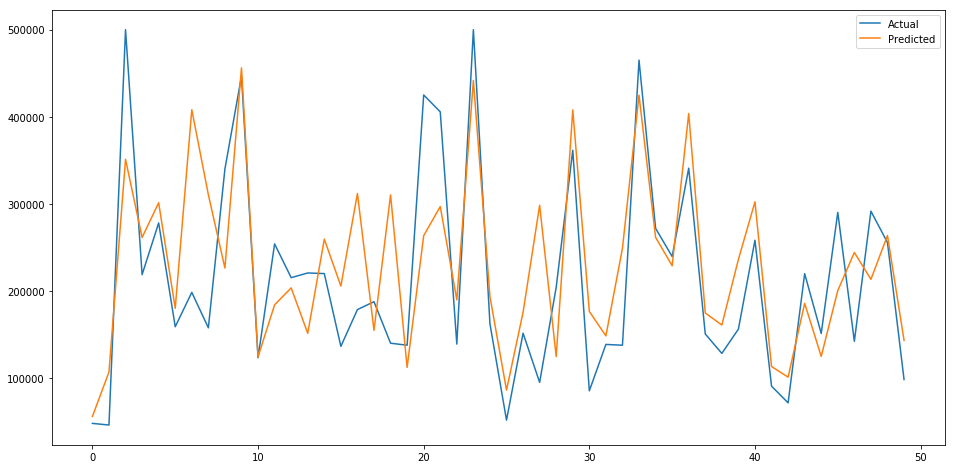

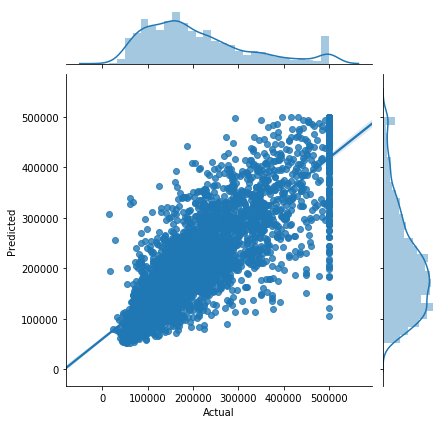

In [37]:
#plot actual vs predicted
test = pd.DataFrame({'Predicted':pred,'Actual':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual','Predicted'])
sns.jointplot(x='Actual',y='Predicted',data=test,kind="reg")

### Perform Linear Regression with one independent variable

In [38]:
#Extract just the median_income column from the independent variables
X_ind = df['median_income']
y_ind = y

In [39]:
X_ind.head()

0    8.3252
1    8.3014
2    7.2574
3    5.6431
4    3.8462
Name: median_income, dtype: float64

In [40]:
X_ind.shape

(20640,)

In [41]:
X_ind = X_ind.reshape(-1,1)

c:\users\acer\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


In [42]:
X_ind.shape

(20640, 1)

In [43]:
y_ind.shape

(20640,)

In [44]:
y_ind = y_ind.reshape(-1,1)

c:\users\acer\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


In [45]:
y_ind.shape

(20640, 1)

In [46]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_ind, y_ind, test_size=0.20, random_state=42)

In [47]:
print(X_train1.shape,X_test1.shape,y_train1.shape,y_test1.shape)

(16512, 1) (4128, 1) (16512, 1) (4128, 1)


In [48]:
regr_ind = LinearRegression() 
  
regr_ind.fit(X_train1, y_train1) 
print(regr_ind.score(X_test1, y_test1)) 

0.4588591890384666


In [49]:
y_pred2 = regr_ind.predict(X_test1)
print(np.sqrt(metrics.mean_squared_error(y_test1, y_pred)))

72917.26367290958


In [50]:
print(len(y_pred2))
print(len(y_test1))
print(y_pred2[0:5])
print(y_test1[0:5])

4128
4128
[[114958.91676996]
 [150606.88213964]
 [190393.71844449]
 [285059.38345102]
 [200663.31816103]]
[[ 47700]
 [ 45800]
 [500001]
 [218600]
 [278000]]


Text(0, 0.5, ' Predicted median_house_value')

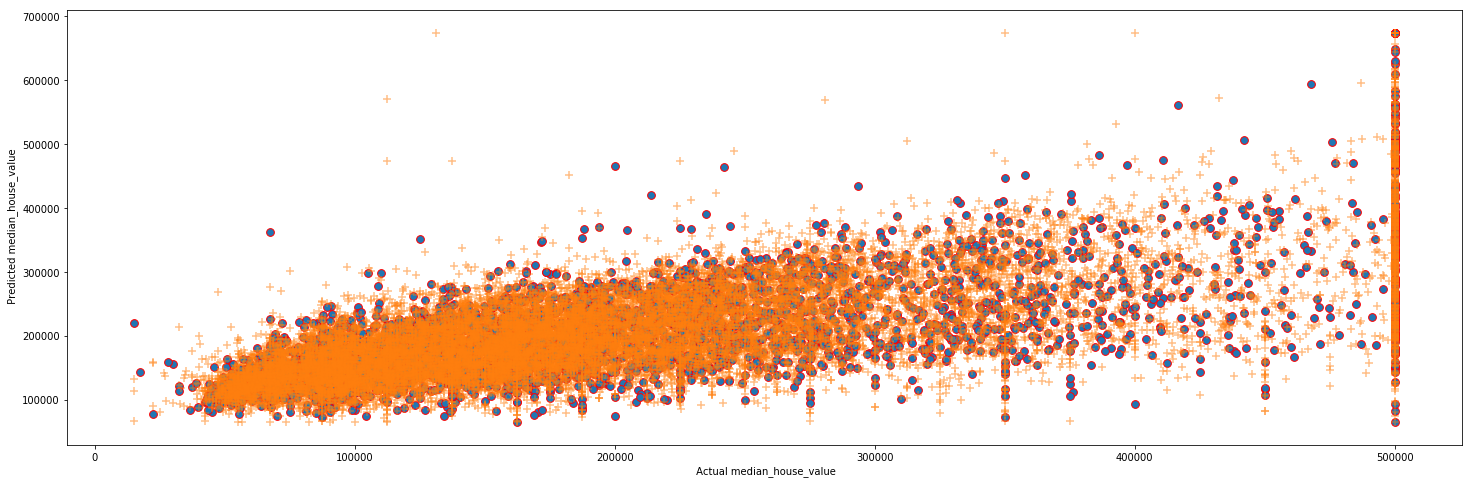

In [51]:
#Plot the fitted model for training data as well as for test data to check if the fitted model satisfies the test data
fig = plt.figure(figsize=(25,8))
plt.scatter(y_test1,y_pred2,marker="o",edgecolors ="r",s=60)
plt.scatter(y_train1,regr_ind.predict(X_train1),marker="+",s=50,alpha=0.5)
plt.xlabel(" Actual median_house_value")
plt.ylabel(" Predicted median_house_value")

## Thanks, That  Concludes the California Project